In [1]:
import pandas as pd
import numpy as np

from main import set_ab_test 
from main import validate_ab_test_data
from main import test_hypothesis_proportions
from main import calc_metrics
from main import test_hypothesis_continuous
from main import print_statistics_report
from main import save_report_to_excel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
EXPERIMENT_NAME = 'ab_price_discount'

exp_df = pd.DataFrame({
    'user_id': [1, 1, 2, 3, 3, 4, 5, 6],
    'platform': [
        'android',
        'android',
        'android',
        'ios',
        'android',
        'android',
        'android',
        'ios',
    ],
    'dt': [
        '2021-01-01', 
        '2021-01-02', 
        '2021-01-01', 
        '2021-01-02', 
        '2021-01-03', 
        '2021-01-02', 
        '2021-01-05', 
        '2021-01-01'
    ],
    'group': [2, 1, 1, 2, 2, 2, 1, 3],
    'payment': [np.nan, 100, np.nan, 110, np.nan, 50, np.nan, 130],
    'clicks': [0, 11, 2, 9, 1, 4, 0, 15]
})

In [4]:
exp_df.describe()

,user_id,group,payment,clicks
count,8.000000,8.000000,4.000000,8.000000
mean,3.125000,1.750000,97.500000,5.250000
std,1.807722,0.707107,34.034296,5.700877
min,1.000000,1.000000,50.000000,0.000000
25%,1.750000,1.000000,87.500000,0.750000
50%,3.000000,2.000000,105.000000,3.000000
75%,4.250000,2.000000,115.000000,9.500000
max,6.000000,3.000000,130.000000,15.000000


In [5]:
exp_df.groupby('dt').describe()

user_id                                              group  \
             count      mean       std  min  25%  50%  75%  max count   
dt                                                                      
2021-01-01     3.0  3.000000  2.645751  1.0  1.5  2.0  4.0  6.0   3.0   
2021-01-02     3.0  2.666667  1.527525  1.0  2.0  3.0  3.5  4.0   3.0   
2021-01-03     1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0   1.0   
2021-01-05     1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0   1.0   

                      ... payment        clicks                                \
                mean  ...     75%    max  count      mean       std  min  25%   
dt                    ...                                                       
2021-01-01  2.000000  ...   130.0  130.0    3.0  5.666667  8.144528  0.0  1.0   
2021-01-02  1.666667  ...   105.0  110.0    3.0  8.000000  3.605551  4.0  6.5   
2021-01-03  2.000000  ...     NaN    NaN    1.0  1.000000       NaN  1.0  1.0   
2021-01-05  1.000000  ...     NaN    NaN    1.0  0.000000       NaN  0.0  0.0   

                             
            50%   75%   max  
dt                           
2021-01-01  2.0   8.5  15.0  
2021-01-02  9.0  10.0  11.0  
2021-01-03  1.0   1.0   1.0  
2021-01-05  0.0   0.0   0.0  

[4 rows x 32 columns]

In [6]:
exp_df.groupby('platform').describe()

user_id                                                group       \
           count      mean       std  min   25%  50%   75%  max count mean   
platform                                                                     
android      6.0  2.666667  1.632993  1.0  1.25  2.5  3.75  5.0   6.0  1.5   
ios          2.0  4.500000  2.121320  3.0  3.75  4.5  5.25  6.0   2.0  2.5   

          ... payment        clicks                                          \
          ...     75%    max  count  mean       std  min    25%   50%   75%   
platform  ...                                                                 
android   ...    87.5  100.0    6.0   3.0  4.195235  0.0   0.25   1.5   3.5   
ios       ...   125.0  130.0    2.0  12.0  4.242641  9.0  10.50  12.0  13.5   

                
           max  
platform        
android   11.0  
ios       15.0  

[2 rows x 32 columns]

In [142]:
m = set_ab_test(
    ab_test_name=EXPERIMENT_NAME, 
    dataframe=exp_df, 
    abgroup_col='group', 
    date_col='dt', 
    uniq_id_col='user_id',
    control_group_name=1,
    significance_level=0.05,
    aggregations=[
        '*',
        'platform'
    ]
)

here


'platform'

'android'

'platform'

'ios'

[Whole dataset, platform = android, platform = ios]


In [143]:
# validate_ab_test_data(EXPERIMENT_NAME)

In [154]:
calc_metrics(
    EXPERIMENT_NAME,
    nominator_col='payment',
    denominator_col='user_id',
    name='conversion to purchase',
    is_uniq_id_proportions=True,
    hypothesis={
        'stat_test': 'chisquare',
        'significance_level': 0.05
    },
    aggregation_values={
        '*': '*',
        'platform': ['android'],
        # ['platform', 'browser']: [['android', 'chrome']]
    }
)

main calc_metrics
calc_metrics conversion to purchase


# Aggregation: Whole dataset

,1,2,3,2-1,3-1,2-1 pvalue,3-1 pvalue
metric,33.33%,50.00%,100.00%,+50.00%,+200.00%,0.659243,0.248213


# Aggregation: platform = android

,1,2,2-1,2-1 pvalue
metric,33.33%,33.33%,+0.00%,1.0


In [128]:
pd.DataFrame([[1],[2]], columns=['a', 'b']) + pd.DataFrame([[3]], columns=['c'])

ValueError: 2 columns passed, passed data had 1 columns

In [93]:
# test_hypothesis_proportions(
#     EXPERIMENT_NAME,
#     nominator='payment',
#     denominator='user_id',
#     stat_test='chisquare', # ztest
#     description='conversion to purchase',
#     uniq_id_rel=True,
#     significance_level=0.95
# )

In [94]:
test_hypothesis_proportions(
    EXPERIMENT_NAME,
    nominator='clicks',
    denominator='user_id',
    stat_test='chisquare', # ztest
    description='CTR',
    uniq_id_rel=False,
    significance_level=0.05
)

'test_hypothesis_proportions'

AttributeError: 'ABManager' object has no attribute 'test_hypothesis_proportions'

'test_hypothesis_continuous'

,group,metric
0,1,33.333333
1,2,40.000000
2,3,130.000000


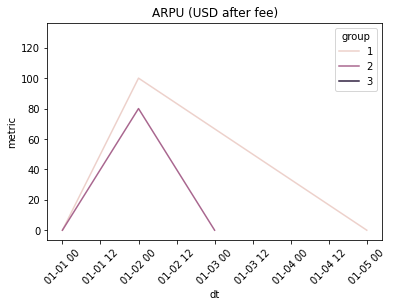

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-2'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

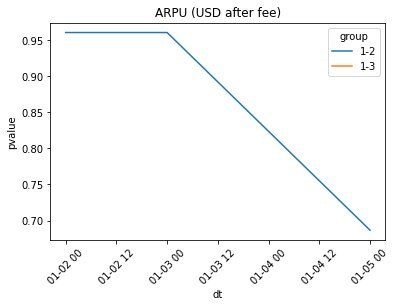

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

In [10]:
test_hypothesis_continuous(
    EXPERIMENT_NAME,
    value='payment',
    stat_test='ttest_welsh',
    description='ARPU (USD after fee)'
)

In [11]:
print_statistics_report(EXPERIMENT_NAME)

,1,2,3,group 1-2 sign.,group 1-3 sign.
metrics,,,,,
conversion to purchase,0.333,0.333 (+0.00%),1.0 (+200.00%),- (H0 accepted),+ (H0 rejected)
CTR,1.625,1.273 (-21.68%),2.5 (+53.85%),- (H0 accepted),- (H0 accepted)
ARPU (USD after fee),33.333,40.0 (+20.00%),NaN,+ (H0 rejected),NaN


'Holm miltiple testing correction is applied'

,pval. 1-2,pval. 1-3,corrected pval. 1-2,corrected pval. 1-3
conversion to purchase,1.000,0.248,1.0,1.0
CTR,1.000,1.000,1.0,1.0
ARPU (USD after fee),0.882,NaN,1.0,NaN


In [12]:
save_report_to_excel(EXPERIMENT_NAME)

'save_report_to_excel'